## Cardio Vascular Disease Analysis :: Prediction using Naive Bayes, Comparison with Neural Network Models, and Explanation using LIME

In [67]:
# Importing Required Packages
import pandas as pd
import matplotlib.pyplot as plt

In [68]:
# Defining metadata for feature plotting
DATA_INFO = {
    'age': {'label': 'Age (in Days)', 'categorical': False},
    'gender': {'label': 'Gender', 'categorical': True},
    'height': {'label': 'Height (in cm)', 'categorical': False},
    'weight': {'label': 'Weight (kg)', 'categorical': False},
    'ap_hi': {'label': 'Systolic Blood Pressure', 'categorical': False},
    'ap_lo': {'label': 'Diastolic Blood Pressure', 'categorical': False},
    'cholesterol': {'label': 'Cholesterol', 'categorical': True},
    'gluc': {'label': 'Glucose', 'categorical': True},
    'smoke': {'label': 'Smoking', 'categorical': True},
    'alco': {'label': 'Alcohol Intake', 'categorical': True},
    'active': {'label': 'Physical Activity', 'categorical': True}
}

In [69]:
# Function for plotting data
def plot_data(dataset, attr):
    info = DATA_INFO[attr]

    if info['categorical']:
        dataset[attr].value_counts().plot(kind='bar')
        plt.title(info['label'] + ' Distribution')

    else:
        dataset[attr].value_counts().plot(kind='hist')
        plt.title(info['label'] + ' Histogram')

    plt.xlabel(info['label'])
    plt.show()

In [70]:
# Read dataset and split features and training to separate datasets
data = pd.read_csv('./data/cardio_train.csv', delimiter=';')
features = data[data.columns[1:-1]]
target = data[data.columns[-1]]

In [71]:
print('Available features:', features.columns.values)

Available features: ['age' 'gender' 'height' 'weight' 'ap_hi' 'ap_lo' 'cholesterol' 'gluc'
 'smoke' 'alco' 'active']


age Data Description:
count    70000.000000
mean     19468.865814
std       2467.251667
min      10798.000000
25%      17664.000000
50%      19703.000000
75%      21327.000000
max      23713.000000
Name: age, dtype: float64


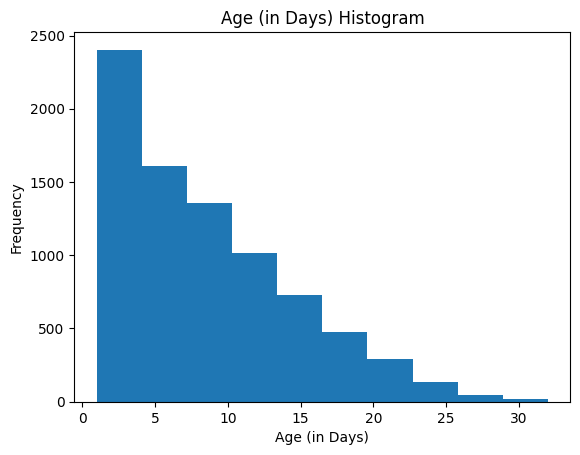

gender Data Description:
count    70000.000000
mean         1.349571
std          0.476838
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          2.000000
Name: gender, dtype: float64


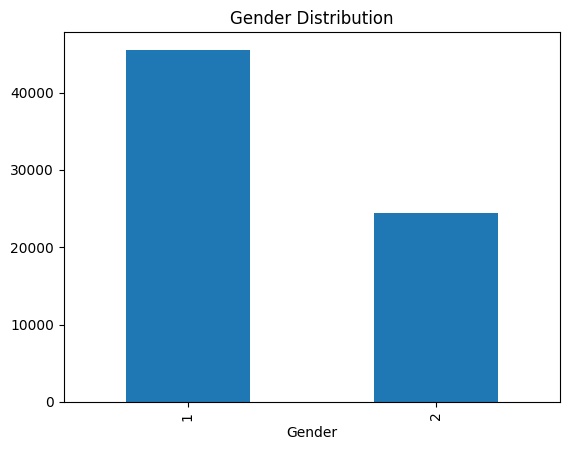

height Data Description:
count    70000.000000
mean       164.359229
std          8.210126
min         55.000000
25%        159.000000
50%        165.000000
75%        170.000000
max        250.000000
Name: height, dtype: float64


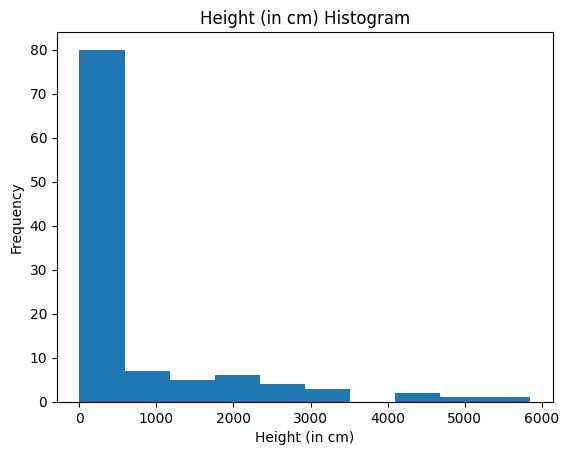

weight Data Description:
count    70000.000000
mean        74.205690
std         14.395757
min         10.000000
25%         65.000000
50%         72.000000
75%         82.000000
max        200.000000
Name: weight, dtype: float64


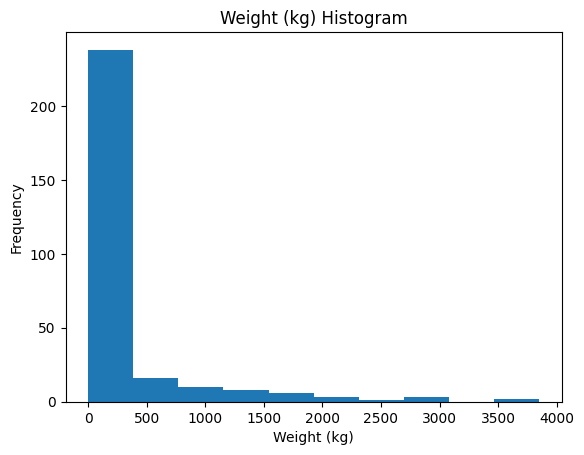

ap_hi Data Description:
count    70000.000000
mean       128.817286
std        154.011419
min       -150.000000
25%        120.000000
50%        120.000000
75%        140.000000
max      16020.000000
Name: ap_hi, dtype: float64


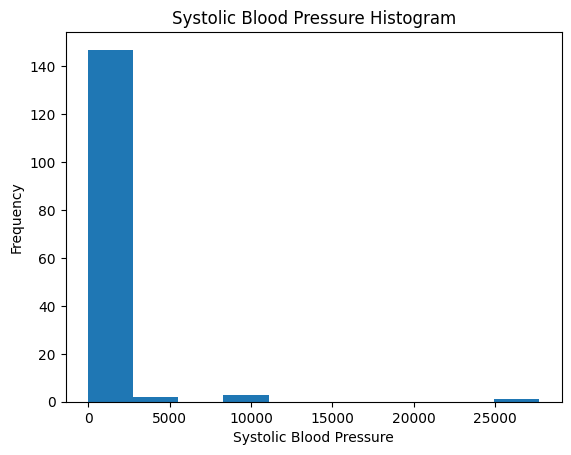

ap_lo Data Description:
count    70000.000000
mean        96.630414
std        188.472530
min        -70.000000
25%         80.000000
50%         80.000000
75%         90.000000
max      11000.000000
Name: ap_lo, dtype: float64


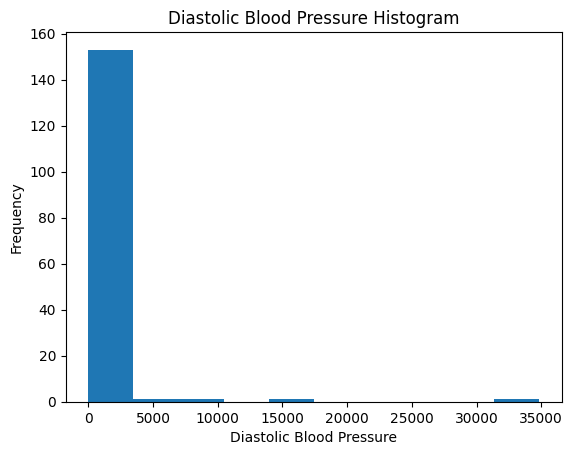

cholesterol Data Description:
count    70000.000000
mean         1.366871
std          0.680250
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          3.000000
Name: cholesterol, dtype: float64


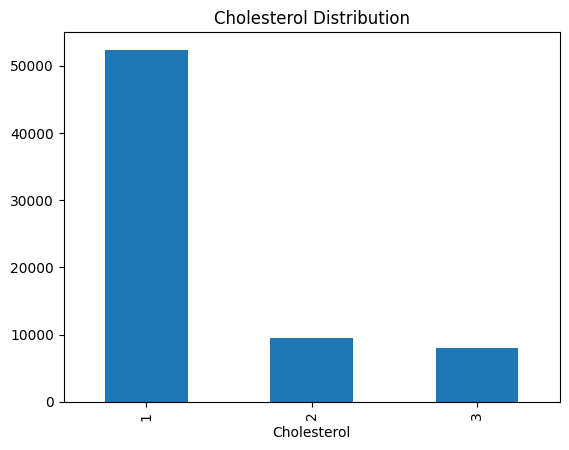

gluc Data Description:
count    70000.000000
mean         1.226457
std          0.572270
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          3.000000
Name: gluc, dtype: float64


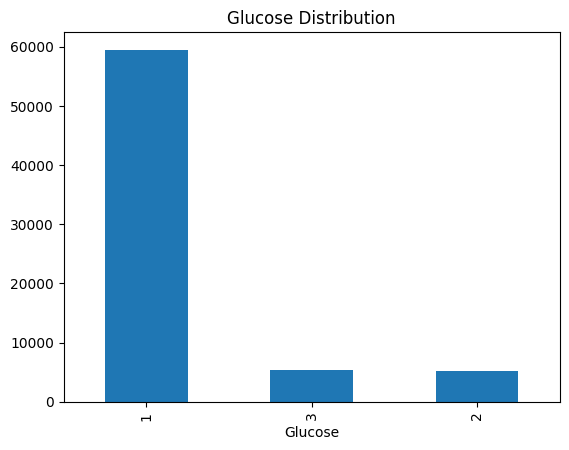

smoke Data Description:
count    70000.000000
mean         0.088129
std          0.283484
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: smoke, dtype: float64


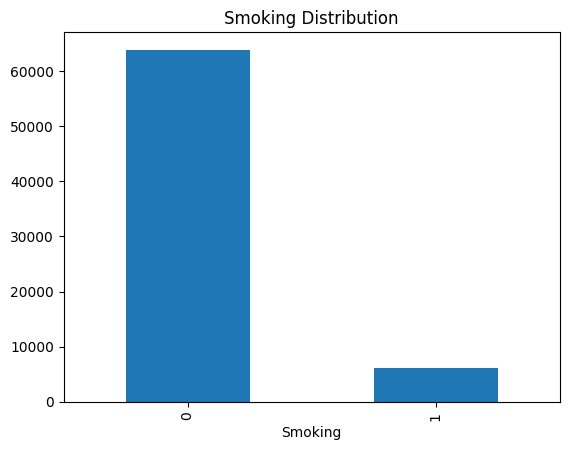

alco Data Description:
count    70000.000000
mean         0.053771
std          0.225568
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: alco, dtype: float64


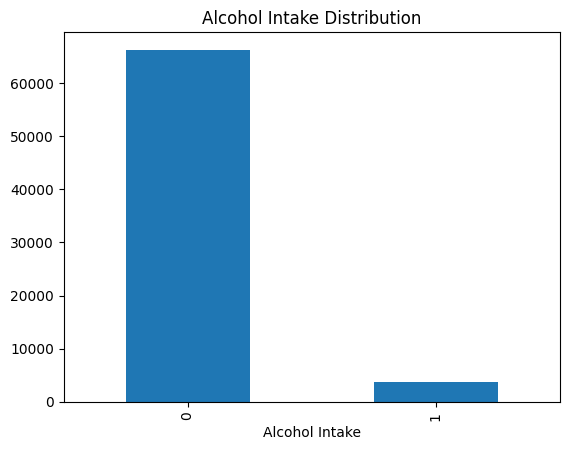

active Data Description:
count    70000.000000
mean         0.803729
std          0.397179
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: active, dtype: float64


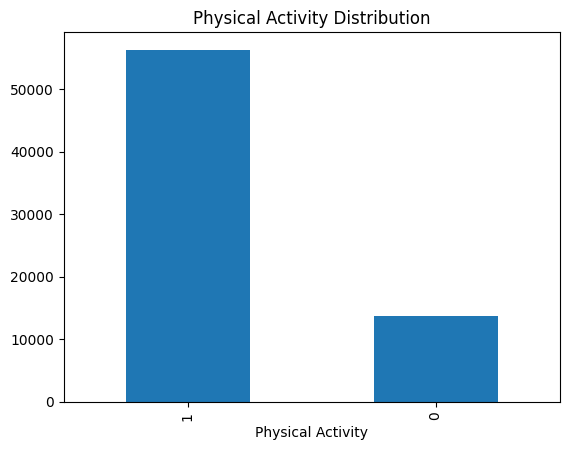

In [72]:
# Describe features and plot
for feature in features.columns:
    print(feature + ' Data Description:', features[feature].describe(), sep='\n')
    plot_data(features, feature)

* It can be observed that the **age** feature is captured in days, which can be converted to years to scale the data.
* Also, the **height** and **weight** features can be used to compute **BMI**, which would scale the data further and make it concise.
* Furthermore, the **ap_hi** and **ap_lo** features contain values that are either too large or negative, which is deemed invalid. These can be removed too.

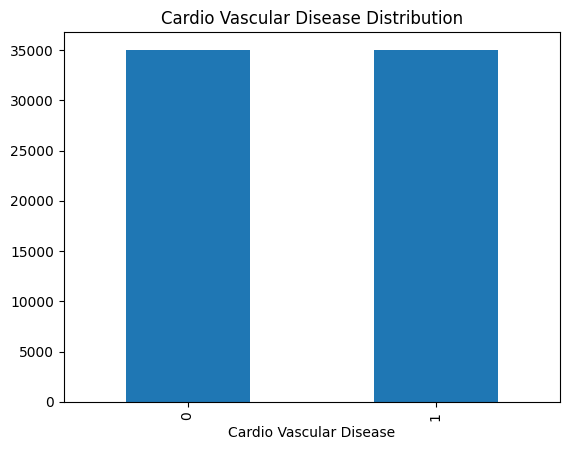

In [73]:
# Plot target variable
target.value_counts().plot(kind='bar')
plt.xlabel('Cardio Vascular Disease')
plt.title('Cardio Vascular Disease Distribution')
plt.show()

In [74]:
# Install minimum Redundancy - Maximum Relevance library

!pip install mrmr_selection

In [75]:
# Print number of empty rows
print('Number of empty rows:', data.isna().sum(), sep='\n')

Number of empty rows:
id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64


In [76]:
# Print number of duplicate rows
print('Number of duplicate rows:', data.duplicated().sum())

Number of duplicate rows: 0


In [77]:
# Remove invalid ap_hi and ap_lo values
data = data[data['ap_hi'] > 0]
data = data[data['ap_hi'] <= 200]

data = data[data['ap_lo'] > 0]
data = data[data['ap_lo'] <= 200]

In [78]:
# Reassign feature and target after invalid value removal
features = data[data.columns[1:-1]]
target = data[data.columns[-1]]

In [79]:
# Print top 10 values of age, height and weight values before engineering
print('First 10 Age, Height & Weight values before engineering', features[['age', 'height', 'weight']].head(10), sep='\n')

First 10 Age, Height & Weight values before engineering
     age  height  weight
0  18393     168    62.0
1  20228     156    85.0
2  18857     165    64.0
3  17623     169    82.0
4  17474     156    56.0
5  21914     151    67.0
6  22113     157    93.0
7  22584     178    95.0
8  17668     158    71.0
9  19834     164    68.0


In [80]:
# Calculating age and BMI, and dropping height and weight features
features['age'] = features['age'].transform(lambda age: age / 365)
features['bmi'] = (features['weight'] / (features['height'] * features['height'])) * 10000

features.drop(['height', 'weight'], axis=1, inplace=True)

In [81]:
# Print calculated values
print('First 10 Age & BMI values', features[['age', 'bmi']].head(10), sep='\n')

First 10 Age & BMI values
         age        bmi
0  50.391781  21.967120
1  55.419178  34.927679
2  51.663014  23.507805
3  48.282192  28.710479
4  47.873973  23.011177
5  60.038356  29.384676
6  60.583562  37.729725
7  61.873973  29.983588
8  48.405479  28.440955
9  54.339726  25.282570


In [82]:
# Select features using mRMR
from mrmr import mrmr_classif

selected_features = mrmr_classif(X=features, y=target, K=6)
print('Features selected by mRMR:', selected_features)

100%|██████████| 6/6 [00:00<00:00,  7.25it/s]

Features selected by mRMR: ['ap_hi', 'active', 'age', 'ap_lo', 'cholesterol', 'bmi']


In [83]:
# Update features variable with selected features
features = features[selected_features]

In [84]:
# Update data, keeping only selected features
data = pd.concat([features, target], axis=1)

In [85]:
# Define util methods needed for model training/testing

from matplotlib import pyplot as plt
from sklearn.metrics import classification_report, mean_squared_error
from sklearn.model_selection import cross_val_score, train_test_split

def train_valid_test(model, title, train_x, train_y, test_x, test_y):
    print('Training', title)
    model.fit(train_x, train_y)

    score = cross_val_score(model, train_x, train_y, scoring='accuracy', cv=100)
    print('Mean Accuracy: %.2f' % score.mean())

    plt.plot(score)
    plt.xlabel('Iteration')
    plt.ylabel('Accuracy')
    plt.title('Cross-validation score for accuracy of ' + title)
    plt.show()

    y_pred = model.predict(test_x)
    report = classification_report(y_true=test_y, y_pred=y_pred)

    print(report)
    print('Mean-Squared Error for', title, ': %.2f', mean_squared_error(test_y, y_pred))


def split_train_test_data(data):
    x = data[data.columns[:-1]]
    y = data[data.columns[-1]]

    print('Splitting data for training and testing (70-30 split)')
    x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7)

    return x_train, x_test, y_train, y_test

In [86]:
# Splitting train & test datasets
x_train, x_test, y_train, y_test = split_train_test_data(data)

Splitting data for training and testing (70-30 split)


In [87]:
# Import Naive Bayes Classifiers
from sklearn.naive_bayes import GaussianNB, MultinomialNB

Training Multinomial Naive Bayes
Mean Accuracy: 0.60


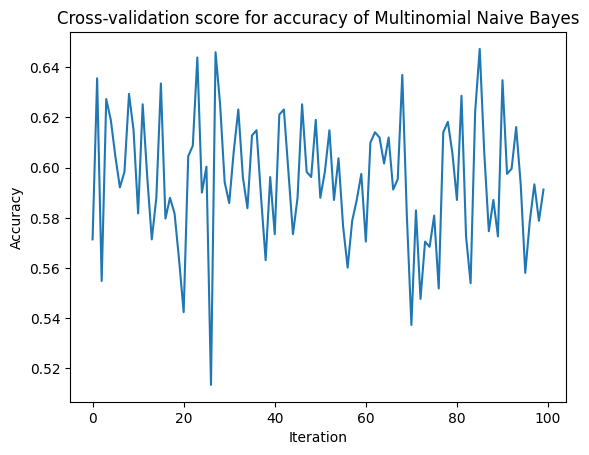

              precision    recall  f1-score   support

           0       0.59      0.64      0.62     10467
           1       0.60      0.55      0.57     10213

    accuracy                           0.60     20680
   macro avg       0.60      0.60      0.60     20680
weighted avg       0.60      0.60      0.60     20680

Mean-Squared Error for Multinomial Naive Bayes : %.2f 0.40357833655705994


In [88]:
# Training/Testing Multinomial Naive Bayes
mnb_model = MultinomialNB()
train_valid_test(mnb_model, 'Multinomial Naive Bayes', x_train, y_train, x_test, y_test)

Training Gaussian Naive Bayes
Mean Accuracy: 0.72


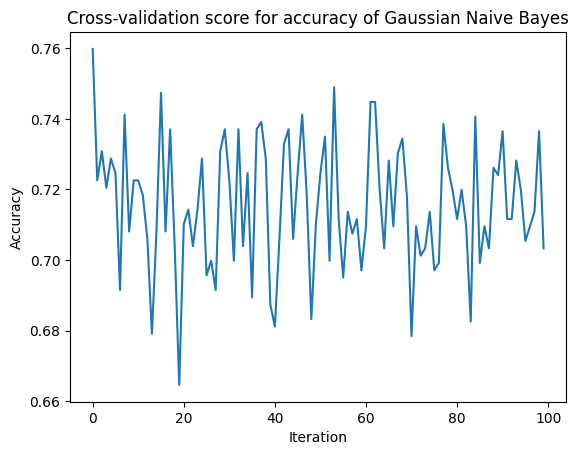

              precision    recall  f1-score   support

           0       0.68      0.82      0.74     10467
           1       0.77      0.60      0.67     10213

    accuracy                           0.71     20680
   macro avg       0.72      0.71      0.71     20680
weighted avg       0.72      0.71      0.71     20680

Mean-Squared Error for Gaussian Naive Bayes : %.2f 0.289458413926499


In [89]:
# Training/Testing Gaussian Naive Bayes
gnb_model = GaussianNB()
train_valid_test(gnb_model, 'Gaussian Naive Bayes', x_train, y_train, x_test, y_test)

In [108]:
# Importing ML models for comparison
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.calibration import CalibratedClassifierCV

Training Logistic Regression
Mean Accuracy: 0.73


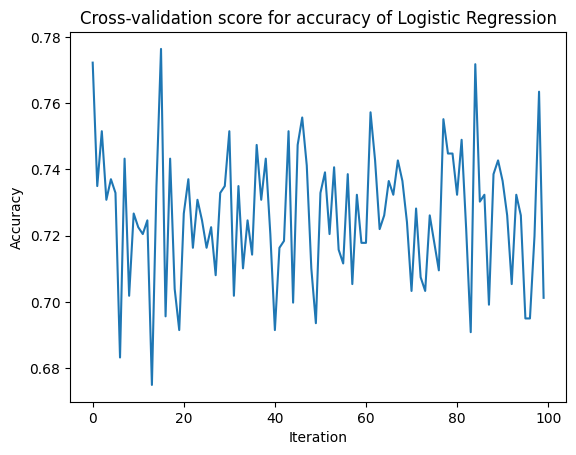

              precision    recall  f1-score   support

           0       0.70      0.78      0.74     10467
           1       0.75      0.66      0.70     10213

    accuracy                           0.72     20680
   macro avg       0.73      0.72      0.72     20680
weighted avg       0.73      0.72      0.72     20680

Mean-Squared Error for Logistic Regression : %.2f 0.27703094777562864


In [109]:
# Training/Testing Logistic Regression
lr_model = LogisticRegression(max_iter=10000)
train_valid_test(lr_model, 'Logistic Regression', x_train, y_train, x_test, y_test)

Training Random Forest
Mean Accuracy: 0.69


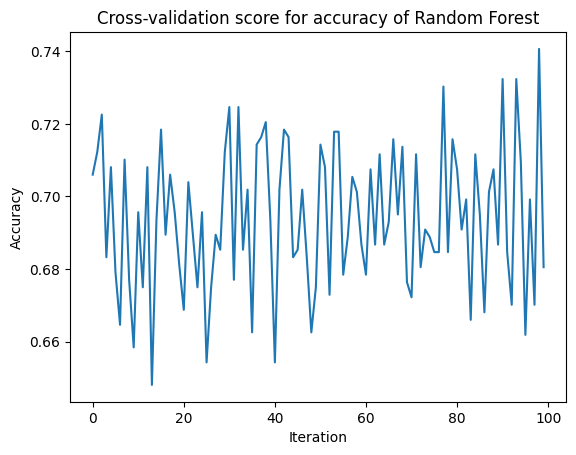

              precision    recall  f1-score   support

           0       0.70      0.71      0.70     10467
           1       0.70      0.69      0.69     10213

    accuracy                           0.70     20680
   macro avg       0.70      0.70      0.70     20680
weighted avg       0.70      0.70      0.70     20680

Mean-Squared Error for Random Forest : %.2f 0.30154738878143134


In [110]:
# Training/Testing Random Forest
rf_model = RandomForestClassifier(n_estimators=50)
train_valid_test(rf_model, 'Random Forest', x_train, y_train, x_test, y_test)

Training SVM
Mean Accuracy: 0.73


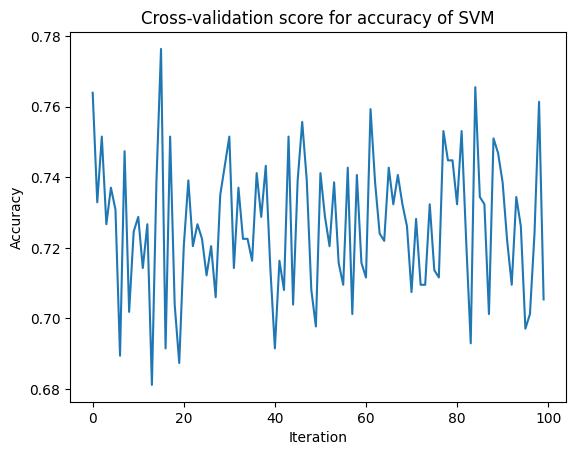

              precision    recall  f1-score   support

           0       0.70      0.78      0.74     10467
           1       0.75      0.66      0.70     10213

    accuracy                           0.72     20680
   macro avg       0.73      0.72      0.72     20680
weighted avg       0.73      0.72      0.72     20680

Mean-Squared Error for SVM : %.2f 0.2772727272727273


In [111]:
# Training/Testing Support Vector Machine (SVM)
svm = LinearSVC(dual=False)
svm_cv = CalibratedClassifierCV(svm)
train_valid_test(svm_cv, 'SVM', x_train, y_train, x_test, y_test)

In [94]:
# Install LIME
!pip install lime

In [95]:
# Importing LIME and numpy
import numpy as np
from lime.lime_tabular import LimeTabularExplainer

In [103]:
# Create Explainer for Naive Bayes
explainer = LimeTabularExplainer(np.array(x_train), feature_names=x_train.columns, verbose=True)

In [101]:
# Print first instance of test data
print('First instance of test data:', x_test.iloc[0], sep='\n')
print('Corresponding true value:', y_test.iloc[0])

First instance of test data:
ap_hi          140.000000
active           1.000000
age             61.791781
ap_lo           80.000000
cholesterol      1.000000
bmi             28.515625
Name: 22996, dtype: float64
Corresponding true value: 0


In [105]:
# Explain the instance for GNB
explain_nb = explainer.explain_instance(x_test.iloc[0], gnb_model.predict_proba)
explain_nb.show_in_notebook(show_table=True)

Intercept 0.8017578693998846
Prediction_local [0.58099389]
Right: 0.5972323052050799


In [113]:
# Explain the instance for SVM
explain_svm = explainer.explain_instance(x_test.iloc[0], svm_cv.predict_proba)
explain_svm.show_in_notebook(show_table=True)

Intercept 0.561737514483311
Prediction_local [0.48781007]
Right: 0.696912560050756
